# Introduction to Artificial Neural Networks with Keras

## Building an Image Classifier using the sequential API

 In this chapter we will tackle Fashion MNIST, which is a drop-in replacement of MNIST (introduced in Chapter 3). It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

### Using Keras to Load the dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype # integer of 8 bits

dtype('uint8')

Note that we have a training set and test set but we don't have a validation set. Let's create one by sampling the training set. Moreover, we are going to use Gradient descent to train our neural network, therefore, it's important to scale the input features. 

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
X_valid.shape, X_train.shape

((5000, 28, 28), (55000, 28, 28))

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Creating the model using the Sequential API

Now let's build the Neural Network:

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10,  activation="softmax"))

In [9]:
# Instead of adding the layers one by one as we just did, you can pass a list of
# layers when creating the Sequential model:

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Plot the model architecture
keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data. We will come back to this later.

In [14]:
# Get a list of the layers in the model
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer('dense') is hidden1

True

In [17]:
# Access all the parameters of a model
weights, biases = hidden1.get_weights()
weights

array([[ 0.02868748,  0.04538555,  0.00086174, ..., -0.04081094,
        -0.03871892, -0.03106317],
       [-0.03827093,  0.00299356,  0.07256086, ...,  0.06509252,
        -0.05744429,  0.07019827],
       [-0.03714681, -0.04563288, -0.07274751, ...,  0.01162924,
         0.01263083, -0.03976258],
       ...,
       [-0.00106271, -0.01510506,  0.03479523, ..., -0.00528109,
        -0.06411009,  0.0004642 ],
       [-0.04914168, -0.05519632, -0.07049496, ..., -0.00942354,
        -0.03793826,  0.04235703],
       [-0.03920947, -0.06082798,  0.06140617, ...,  0.03542081,
        -0.06564701, -0.06699336]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

#### Compiling the model

After a model is created, you must call its *compile()* method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [21]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

# Default learning Rate of "sgd" optimizer = 0.01

#### training and evaluating the model

In [22]:
history = model.fit(X_train, y_train, 
                    epochs=30, validation_data=(X_valid, y_valid))

# Default Batch Size = 32 instances, which, in this case means 
# that an epoch will run 1719 batches of 32 pictures. 

Epoch 1/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.9919 - accuracy: 0.6792 - val_loss: 0.5667 - val_accuracy: 0.8086
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5042 - accuracy: 0.8258 - val_loss: 0.4514 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4528 - accuracy: 0.8421 - val_loss: 0.4337 - val_accuracy: 0.8518
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4246 - accuracy: 0.8516 - val_loss: 0.4149 - val_accuracy: 0.8582
Epoch 5/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3951 - accuracy: 0.8597 - val_loss: 0.4129 - val_accuracy: 0.8568
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3811 - accuracy: 0.8646 - val_loss: 0.4011 - val_accuracy: 0.8558
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3651 - accuracy: 0.8707 - val_loss: 0.3748 - val_acc

The *fit()* method returns a History object containing the training parameters (*history.params*), the list of epochs it went through (*history.epoch*), and most importantly a dictionary (*history.history*) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a pandas DataFrame and call its *plot()* method, you get the learning curves:

In [23]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [24]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

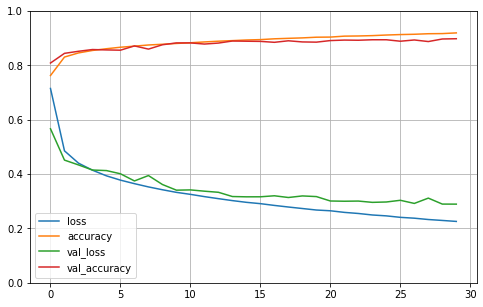

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the vertical range to [0-1]
plt.show()

In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

#### Evaluate the model

To check the general performance of your model, run it against the test set with *evaluate()*:

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 60.0158 - accuracy: 0.8525


[60.01580810546875, 0.8525000214576721]

#### Using the model to make predictions

In [30]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [31]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

In [32]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

### Building a Regression MLP using the sequential API

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Here, we are using the California housing dataset from chapter 02
# except that this one does not contain the categorical variable "ocean_proximity"
# and there is no missing value
housing = fetch_california_housing()

In [35]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [36]:
# Since we are using SGD, we must standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#### Using the Sequential API

In [37]:
X_train.shape

(11610, 8)

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.2938 - val_loss: 0.5768
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6205 - val_loss: 0.5433
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6419 - val_loss: 0.4821
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4850 - val_loss: 0.4563
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4678 - val_loss: 0.4449
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4548 - val_loss: 0.4425
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4403 - val_loss: 0.4392
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4213 - val_loss: 0.4280
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4193 - val_loss: 0.4238
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4201 - val_loss: 0.4164

In [39]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3976


In [40]:
X_new = X_test[:5]
y_pred = model.predict(X_new)
print(y_test[:5])
print(y_pred.reshape(5))

[3.    3.604 3.72  1.739 1.448]
[2.643928  3.1694813 2.9820242 2.552126  1.168729 ]


## Building complex models using the functional API

So far, we've developed our models using the **Sequential API**, where we stack layer by layer passing the input shape, number of neurons, loss function, activation function, optimizers and evaluation metric.

However, there are other options on building your own neural network with a custom architecture. Now let's talk about the **Functional API**. 

One example of a nonsequential neural network is a Wide & Deep neural network. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al. (Heng-Tze Cheng et al., “Wide & Deep Learning for Recommender Systems,” Proceedings of the First Workshop on Deep Learning for Recommender Systems (2016): 7–10.)

![wide_deep_nn](./images/ch10_wide_deep_nn.png)

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short/wide path).

Let's build such a NN using the functional approach:

In [41]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Notice that we indicate which layer will be the input of another calling it like a function, passing it the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet.

Once you have built the Keras model, everything is exactly like earlier, so there’s no need to repeat it here: you must compile the model, train it, evaluate it, and use it to make predictions.

In [42]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.7825 - val_loss: 0.7766
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7402 - val_loss: 0.6841
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6818 - val_loss: 0.6459
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6345 - val_loss: 0.6184
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5864 - val_loss: 0.5950
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6031 - val_loss: 0.5763
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5691 - val_loss: 0.5623
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5468 - val_loss: 0.5505
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5480 - val_loss: 0.5401
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5228 - val_loss: 0.5331

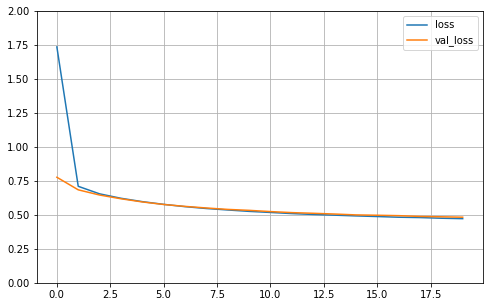

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # Set the vertical range to [0-1]
plt.show()

### Functional API: Multiple inputs

Everything works fine until now, but what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path (see Figure 10-15)? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

Let's try to implement the following NN archictecture with the Keras Functional API:

![multiple_inputs](./images/ch10_multiple_inputs.png)

In [44]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# Note it does not need to pass an argument like in the other layers
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Now we can compile the model as usual, but when we call the *fit()* method, instead of passing a single input matrix *X_train*, we must pass a pair of matrices *(X_train_A, X_train_B)*: one per input. The same is true for *X_valid*, and also for *X_test* and *X_new* when you call *evaluate()* or *predict()*:

In [45]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(x=(X_train_A, X_train_B), y=y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 3.0451 - val_loss: 0.8666
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8103 - val_loss: 0.6983
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6717 - val_loss: 0.6457
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6495 - val_loss: 0.6098
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6112 - val_loss: 0.5832
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5770 - val_loss: 0.5595
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5484 - val_loss: 0.5427
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5294 - val_loss: 0.5247
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5299 - val_loss: 0.5123
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4885 - val_loss: 0.5029

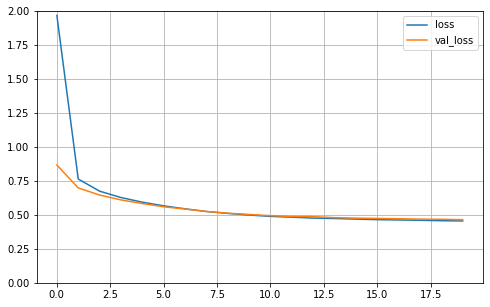

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # Set the vertical range to [0-1]
plt.show()

In [47]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4944


In [48]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[2.0685525],
       [3.033167 ],
       [2.8464766]], dtype=float32)

### Functional API: Multiple inputs and outputs

There are many use cases in which you may want to have multiple output

- The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.

- Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.

- Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see Figure 10-16) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

![multiple_inputs_outputs](./images/ch10_multiple_inputs_outputs.png)

In [49]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# Note it does not need to pass an argument like in the other layers
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)

aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [50]:
# Each output will need its own loss function
# Assign more weight to the loss of the main output
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [51]:
history = model.fit(x=[X_train_A, X_train_B], y=[y_train, y_train], epochs=20,  
                   validation_data=([X_valid_A, X_valid_B],[y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8243 - main_output_loss: 1.6289 - aux_output_loss: 3.5831 - val_loss: 0.6415 - val_main_output_loss: 0.5640 - val_aux_output_loss: 1.3389
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6214 - main_output_loss: 0.5500 - aux_output_loss: 1.2636 - val_loss: 0.5662 - val_main_output_loss: 0.5018 - val_aux_output_loss: 1.1461
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5275 - main_output_loss: 0.4676 - aux_output_loss: 1.0672 - val_loss: 0.5237 - val_main_output_loss: 0.4696 - val_aux_output_loss: 1.0107
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4979 - main_output_loss: 0.4485 - aux_output_loss: 0.9422 - val_loss: 0.5005 - val_main_output_loss: 0.4567 - val_aux_output_loss: 0.8943
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4715 - main_output_loss: 0.4286 - aux_output_loss: 0.8576 - val_loss

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [52]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 3ms/step - loss: 0.4366 - main_output_loss: 0.4256 - aux_output_loss: 0.5357


Similarly, the *predict()* method will return predictions for each output:

In [53]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main, y_pred_aux)

[[2.6764226]
 [3.0979943]
 [2.919538 ]] [[2.3444784]
 [2.8467288]
 [3.0058296]]


## Using the Subclassing API to build Dynamic Models

There is one last that way you can build Keras models. Both the Sequential API and the Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model). It’s also fairly easy to debug, since the whole model is a static graph of layers. But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the Subclassing API is for you.

Simply subclass the *Model* class, create the layers you need in the constructor, and use them to perform the computations you want in the *call()* method. For example, if you want to implement the neural network we just built using the functional API, do as follows:

In [54]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

## Saving and Restoring a Model

Saving a model is a trivial task. You just have to follow all the steps presented earlier. Instantiate a model, train and evaluate it. Then, you can save it.

Keras will use the HDF5 format to save both the model’s architecture (including every layer’s hyperparameters) and the values of all the model parameters for every layer (e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters and any state it may have).

In [55]:
# model = keras.layers.Sequential([...]) # or keras.Model([...])
# model.compile([...])
# model.fit([...])

# save the model in HDF5 format
# model.save("my_keras_model.h5")

Restoring a model is just as simple:

In [56]:
# model = keras.models.load_model("my_keras_model.h5")

Note that the *save()* and *load_model()* functions can only be used with the Sequential or functional API. When using model subclassing, all you can do is to use *save_weights()* and *load_weigths*, the other parameters you'll have to restore yourself.

What if the training lasts several hours? You can't rely on model saving only after the whole training is complete. You must save checkpoints during the execution of the *fit()* method. *Callbacks* come to this aid.

### Using Callbacks

The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call at the start and end of **training**, at the start and end of each **epoch**, and even before and after processing each **batch**.

In [57]:
# [...] # build and compile the model
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
# history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Moreover, if you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set. This is another option to implement the early stopping strategy discussed in chapter 4:

In [58]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
#                                                 save_best_only=True)
# history = model.fit(X_train, y_train, epochs=10,
#                     validation_data=(X_valid, y_valid),
#                     callbacks=[checkpoint_cb])
# model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Another way to implement early stopping is simply calling it:

In [59]:
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
#                                                   restore_best_weights=True)
# history = model.fit(X_train, y_train, epochs=100,
#                     validation_data=(X_valid, y_valid),
#                     callbacks=[checkpoint_cb, early_stopping_cb])

### Custom callbacks

You you want more control on callbacks, you can implement your owns by subclassing the class *keras.callbacks.Callback*. 

In [60]:
# display the ratio between the validation loss and the 
# training loss during training (e.g., to detect overfitting):
# class PrintValTrainRatioCallback(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

As you might expect, you can also use *on_train_begin()*, *on_train_end()*, *on_epoch_begin()*, *on_epoch_end()*, *on_batch_begin()*, and *on_batch_end()*. Callbacks can also be used during evaluation and predictions, should you ever need them (e.g., for debugging). For evaluation, you should implement *on_test_begin()*, *on_test_end()*, *on_test_batch_begin()*, or *on_test_batch_end()* (called by *evaluate()*), and for prediction you should implement *on_predict_begin()*, *on_predict_end()*, *on_predict_batch_begin()*, or *on_predict_batch_end()* (called by *predict()*).

## TensorBoard

TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you, and more!

In [70]:
import os 
root_logdir = os.path.join(os.curdir, "my_logs")

In [71]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [72]:
run_logdir = get_run_logdir() # e.g., './my_logs/run_2021_03_12-10_15_50'

In [73]:
# build and compile the model

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10,  activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", # Default learning Rate of "sgd" optimizer = 0.01
              metrics=["accuracy"])

In [74]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0268 - accuracy: 0.6726 - val_loss: 0.5405 - val_accuracy: 0.8096
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5030 - accuracy: 0.8247 - val_loss: 0.4504 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4462 - accuracy: 0.8421 - val_loss: 0.4086 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4235 - accuracy: 0.8503 - val_loss: 0.4084 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3986 - accuracy: 0.8591 - val_loss: 0.3874 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3831 - accuracy: 0.8644 - val_loss: 0.3632 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3672 - accuracy: 0.8701 - val_loss: 0.3611 - val_accura

In [76]:
# Open on Browser
# tensorboard --logdir=./my_logs --port=6006

# Open on Jupyter
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

## Fine-Tuning Neural Network Hyperparameters

The main drawbacks of neural networks is the possible value of each hyperparameters. The search space is too wide. In chapter 2 we saw two techniques using K-fold Cross Validation to find the best parameters out from a specified set of parameters sample: *GridSearchCV* or *RandomizedSearchCV*. However, we were using scikit-learn back then.

To use keras now, we need to make some adaptations. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [77]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.Dense(1))
        optimizer = keras.optimizers.SGD(lr=learning_rate)
        model.compile(loss="mse", optimizer=optimizer)
    return model

Next, let’s create a *KerasRegressor* based on this *build_model()* function:

In [78]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

# Since we did not specify any hyperparameters when creating it, 
# it will use the default hyperparameters we defined in build_model()

Now we can use this object like a regular Scikit-Learn regressor: we can train it using its *fit()* method, then evaluate it using its *score()* method, and use it to make predictions using its *predict()* method, as you can see in the following code:

In [79]:
# keras_reg.fit(X_train, y_train, epochs=100,
#              validation_data=(X_valid, y_valid),
#              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# mse_test = keras_reg.score(X_test, y_test)
# y_pred = keras_reg.predict(X_new)

Note that any extra parameter you pass to the *fit()* method will get passed to the underlying Keras model. Also note that the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses (i.e., higher should be better).

Now we can implement RandomizedSearchCV on this keras regressor, just like we would do to a scikit-learn regressor:

In [86]:
# from scipy.stats import reciprocal
# from sklearn.model_selection import RandomizedSearchCV

# param_distribs = {
#     "n_hidden": [0, 1, 2, 3],
#     "n_neurons": np.arange(1, 100),
#     "learning_rate": reciprocal(3e-4, 3e-2)
# }

# rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
# rnd_search_cv.fit(X_train, y_train, epochs=100,
#                  validation_data=(X_valid, y_valid),
#                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Note that *RandomizedSearchCV* uses K-fold cross-validation, so it does not use *X_valid* and *y_valid*, which are only used for early stopping. Lastly, you just need to select the best model out of the jointly sampled parameters:

In [87]:
# rnd_search_cv.best_params_

In [88]:
# rnd_search_cv.best_score_

In [89]:
# model = rnd_search_cv.best_estimator_.model

You can use several techniques to find the hyperparameters that best fits your ML problems. Nonetheless, it is also important to have an idea of what values are reasonable for each hyperparameter so that you can build a quick prototype and restrict the search space.